In [1]:
# import librries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# import coin datas
import yfinance as yf
xmr = yf.Ticker("XMR-USD")
df_xmr = yf.download(tickers = "XMR-USD",
                     start = "2022-09-07",
                     end = "2023-09-09" , 
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [24]:
df_xmr.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-04,140.842804,143.770203,140.776291,141.170868,141.170868,63835398
2023-09-05,141.176682,141.299179,137.673279,137.781372,137.781372,54468002
2023-09-06,137.780243,142.644989,137.635544,142.113235,142.113235,67734044
2023-09-07,142.107117,143.275955,141.168930,143.250748,143.250748,62422431
2023-09-08,143.257370,144.124344,140.928955,143.886154,143.886154,46927009


In [3]:
change = []
X = []
for i in range(len(df_xmr.index[:-2])) : 
    change.append(df_xmr[df_xmr.index == df_xmr.index[i+1]]["Close"].values-df_xmr[df_xmr.index == df_xmr.index[i]]["Close"].values > 0 )
    X.append(df_xmr[df_xmr.index == df_xmr.index[i]]["Close"].values)

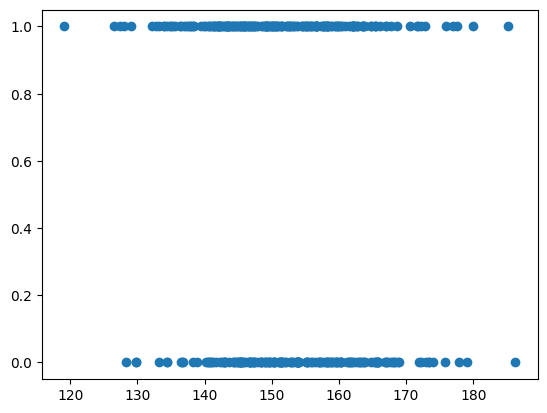

In [4]:
plt.scatter(X,change)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
kn = KNeighborsClassifier()

In [6]:
#print(kn.predict(np.array([137.781372]).reshape(-1,1))+ 137.781372)
params_knn = {"n_neighbors" : [4,5,6,7,8,9,10,11,20] }
clf = GridSearchCV(kn , params_knn , cv= 5)
clf.fit(X , change)

C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:233: 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 5, 6, 7, 8, 9, 10, 11, 20]})

In [7]:
print(clf.best_params_ , clf.best_score_)

{'n_neighbors': 20} 0.4904109589041095


In [8]:
y_new = []
X_new = []
for i in range(len(df_xmr.index[:-2])) : 
    y_new.append(df_xmr[df_xmr.index == df_xmr.index[i+1]]["Close"].values-df_xmr[df_xmr.index == df_xmr.index[i]]["Close"].values)
    X_new.append(df_xmr[df_xmr.index == df_xmr.index[i]]["Close"].values)

In [9]:
for i in range(len(X)) : 
    for j in range(i,len(X)) :
        if X_new[j] < X_new[i] : 
            X_new[j] , X_new[i]= X_new[i] , X_new[j]
            y_new[j] , y_new[i] =  y_new[i] , y_new[j]

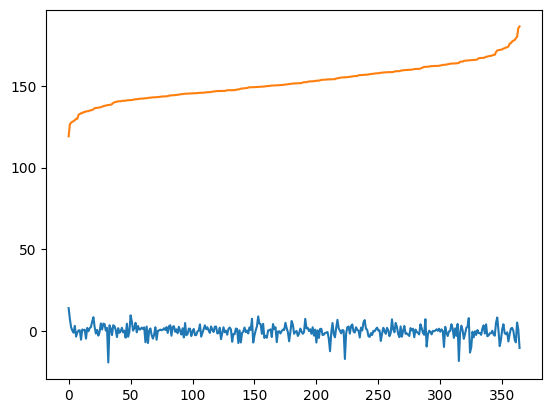

In [10]:
plt.plot( [i for i in range(len(X_new))] , y_new)
plt.plot([i for i in range(len(X_new))] , X_new)

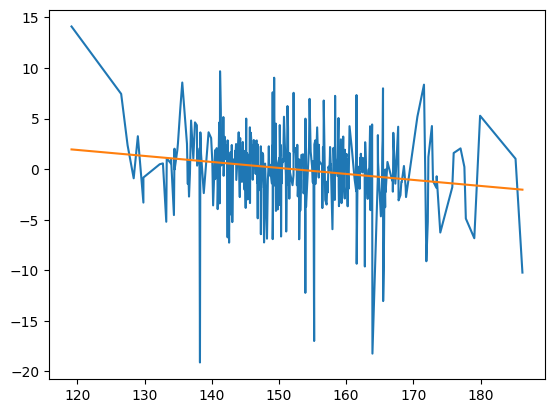

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_new,y_new)
y_pred= reg.predict(X_new)
plt.plot(X_new,y_new)
plt.plot(X_new , y_pred)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
x_pol = poly.fit_transform(X_new)

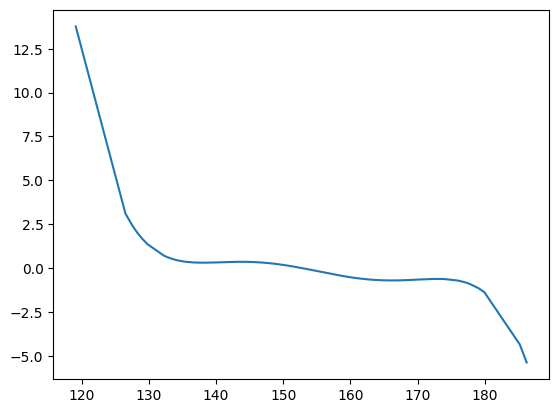

In [13]:
reg.fit(x_pol, y_new)
y_pred_poly = reg.predict(x_pol)
plt.plot(X_new,y_pred_poly)

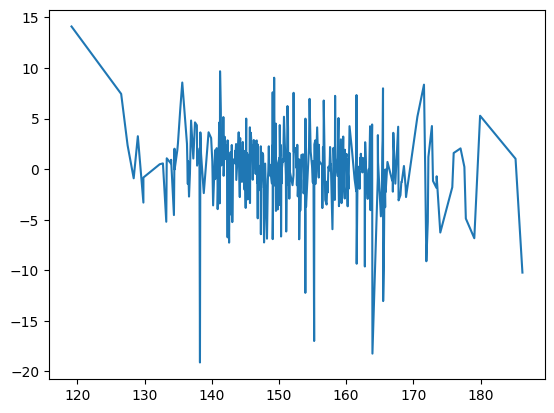

In [14]:
plt.plot(X_new , y_new)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score , r2_score , recall_score , precision_score

In [44]:
n_days = 15
n_neigh = 8
for h in range(1,n_days) :
    f_sc = 0 
    r_sc = 0
    p_sc = 0
    nn = 0
    for t in range(2,n_neigh) :
        kll = []
        y_change = []
        for i in range(h,len(df_xmr)) : 
            g =[ df_xmr.iloc[j]["Close"] for j in range(i-h,i) ]
            kll.append(g)
        for i in range(1,len(df_xmr)) : 
            y_change.append(df_xmr.iloc[i]["Close"] > df_xmr.iloc[i-1]["Close"])
        knn_10 = KNeighborsClassifier(n_neighbors=t)
        knn_10.fit(kll,y_change[h-1:])
        y_10 = knn_10.predict(kll)
        ff_sc = f1_score(y_true=y_change[h-1:] , y_pred = y_10)
        rr_sc = recall_score(y_true=y_change[h-1:] , y_pred = y_10)
        pp_sc = precision_score(y_true=y_change[h-1:] , y_pred = y_10)
        nn = t if ff_sc > f_sc else nn
        f_sc = ff_sc if ff_sc > f_sc else f_sc
        r_sc = rr_sc if rr_sc > r_sc else r_sc
        p_sc = pp_sc if pp_sc > p_sc else p_sc
    print(h, nn  , ":" )
    print(f_sc)
    print(r_sc)
    print(p_sc)

1 3 :
0.7813267813267815
0.7871287128712872
1.0
2 3 :
0.8179669030732861
0.8606965174129353
1.0
3 3 :
0.7549019607843137
0.77
1.0
4 3 :
0.8066825775656324
0.845
1.0
5 3 :
0.775
0.7788944723618091
1.0
6 3 :
0.7405541561712846
0.7525252525252525
1.0
7 3 :
0.7692307692307692
0.7828282828282829
1.0
8 3 :
0.7761194029850746
0.7969543147208121
1.0
9 3 :
0.7673267326732673
0.7918781725888325
1.0
10 3 :
0.7642679900744416
0.8061224489795918
1.0
11 3 :
0.7794117647058825
0.8112244897959183
1.0
12 3 :
0.7804878048780487
0.8163265306122449
1.0
13 3 :
0.7665847665847666
0.8112244897959183
1.0
14 3 :
0.7531172069825437
0.7743589743589744
1.0


In [57]:
best_n_days = 4
bes_n_neigh = 3 
kll_final = []
y_change_final = []
for i in range(best_n_days,len(df_xmr)) : 
    g =[ df_xmr.iloc[j]["Close"] for j in range(i-best_n_days,i) ]
    kll_final.append(g)
for i in range(1,len(df_xmr)) : 
    y_change_final.append(df_xmr.iloc[i]["Close"] > df_xmr.iloc[i-1]["Close"])
knn_10 = KNeighborsClassifier(n_neighbors=bes_n_neigh)
knn_10.fit(kll_final,y_change_final[best_n_days-1:])
y_10_final = knn_10.predict(kll_final)

In [58]:
ff_sc = f1_score(y_true=y_change_final[best_n_days-1:] , y_pred = y_10_final)
print(ff_sc)

0.8066825775656324


In [59]:
df_xmr_test = yf.download(tickers = "XMR-USD",
                     start = "2023-09-04",
                     end = "2023-10-07" , 
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [60]:
kll_t = []
y_t = []
for i in range(best_n_days,len(df_xmr_test)) : 
    g = [df_xmr_test.iloc[j]["Close"] for j in range(i-best_n_days,i)]
    kll_t.append(g)
for i in range(1,len(df_xmr_test)) : 
    y_t.append(df_xmr_test.iloc[i]["Close"] > df_xmr_test.iloc[i-1]["Close"])
y_pred_t = knn_10.predict(kll_t)

In [61]:
ff_t = f1_score(y_true=y_t[best_n_days-1:] , y_pred = y_pred_t)
print(ff_t)

0.7368421052631577
